## Datas Linear regression
<div class="alert alert-info">
<i class="fa fa-info-circle"></i>   
Ce notebook reprend les données de datas. Sur ce dataset, nous appliquons les méthodes de régression linéaire
</div

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
   

In [2]:
from google.colab import drive
drive.mount('/gdrive')

import os
path = "/gdrive/.shortcut-targets-by-id/1n7Bl5_QVpPlRHXYKfEZjaJsttl5Af03A/Projet temperatures/datasets/"
os.listdir(path)

Mounted at /gdrive


['co2_data.csv',
 'global_temperature.csv',
 'climate-change_owid.csv',
 'temperature-anomaly.csv',
 'hadcrut-surface-temperature-anomaly.csv',
 'co2_data.gsheet',
 'Global_annual_mean_temp.csv',
 'temperature_by_continent',
 'Continent_temperatures_anomalies_by_year.csv',
 'datas.csv']

In [3]:
df = pd.read_csv(path +'datas.csv', header = 0)

In [4]:
df = df.drop('iso_code', axis = 1)

feats = df.drop('temp_anomaly', axis = 1)

target = df['temp_anomaly']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

In [6]:
cat_train = pd.get_dummies(X_train['country'], columns = 'country') 
cat_test = pd.get_dummies(X_test['country'], columns = 'country') 

In [7]:
X_train2 = pd.concat([X_train,cat_train], axis = 1)
X_test2 = pd.concat([X_test,cat_test], axis = 1)

In [8]:
X_train2 = X_train2.drop('country', axis = 1)
X_test2 = X_test2.drop('country', axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num = ['year', 'population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2', 'total_ghg']

X_train2.loc[:,num] = sc.fit_transform(X_train2[num])
X_test2.loc[:,num] = sc.transform(X_test2[num])

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train2, y_train)
print("Accuracy score de la Régression Logistique : ",
      regressor.score(X_test2, y_test))


Accuracy score de la Régression Logistique :  0.7067733871317345


In [11]:
coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(X_train2.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)


,valeur estimée
intercept,0.188249
year,0.412546
population,0.046386
gdp,0.101070
cement_co2,-0.146921
co2,9.277712
co2_per_capita,-0.091265
coal_co2,-4.941233
flaring_co2,-0.136740
gas_co2,-1.737455


In [12]:
print('Coefficient de détermination du modèle sur train:', regressor.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test2, y_test))


Coefficient de détermination du modèle sur train: 0.6907730750775487
Coefficient de détermination du modèle sur test: 0.7067733871317345


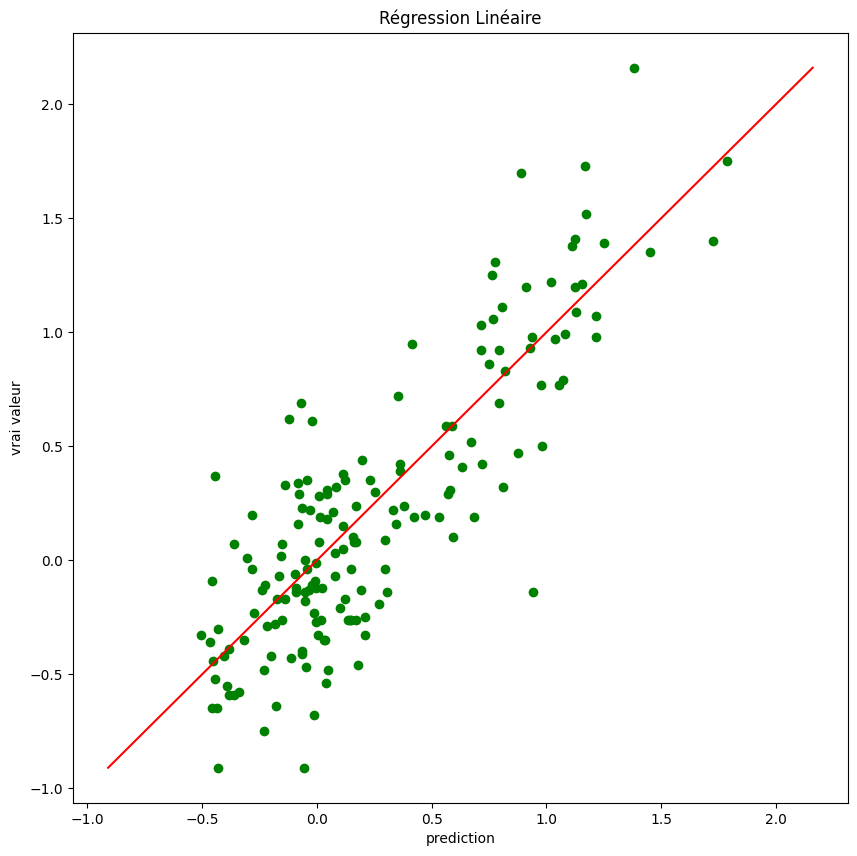

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test2)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire')

plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train2, y_train)

#On observe un réel overfitting
print(regressor.score(X_train2,y_train))
print(regressor.score(X_test2,y_test))

1.0
0.6477530667455965


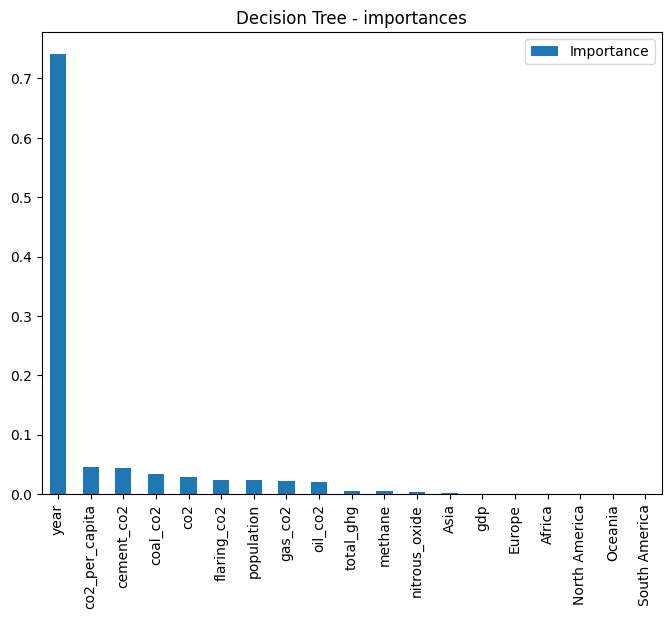

In [15]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Decision Tree - importances')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train2, y_train)

print(rfr.score(X_train2, y_train))
print(rfr.score(X_test2, y_test))

0.9537116811052384
0.7458257019873131


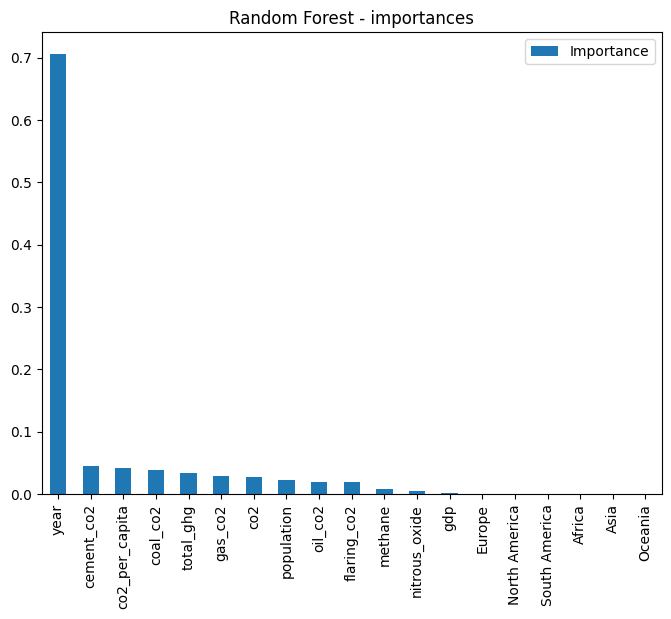

In [17]:
feat_importances = pd.DataFrame(rfr.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Random Forest - importances')
plt.show()

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train2, y_train).predict(X_test2)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.638707


In [19]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train2, y_train).predict(X_test2)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.658412


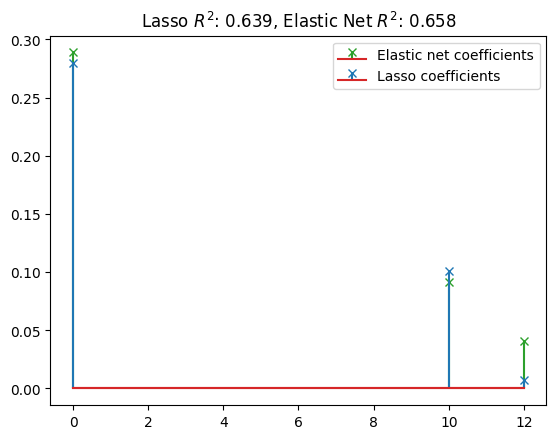

In [20]:
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
)


plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

## Même exercice sans la colonne 'year'.

In [21]:
df2 = pd.read_csv(path +'datas.csv', header = 0)

df2 = df2.drop('iso_code', axis = 1)
df2 = df2.drop('year', axis = 1)

feats = df2.drop('temp_anomaly', axis = 1)

target = df2['temp_anomaly']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

cat_train = pd.get_dummies(X_train['country'], columns = 'country') 
cat_test = pd.get_dummies(X_test['country'], columns = 'country') 

X_train2 = pd.concat([X_train,cat_train], axis = 1)
X_test2 = pd.concat([X_test,cat_test], axis = 1)

X_train2 = X_train2.drop('country', axis = 1)
X_test2 = X_test2.drop('country', axis = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num = ['population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2', 'total_ghg']

X_train2.loc[:,num] = sc.fit_transform(X_train2[num])
X_test2.loc[:,num] = sc.transform(X_test2[num])



In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train2, y_train)
print("Accuracy score de la Régression Logistique : ",
      regressor.score(X_test2, y_test))


Accuracy score de la Régression Logistique :  0.6475816369853901


In [24]:
coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(X_train2.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)

,valeur estimée
intercept,0.202185
population,0.845663
gdp,0.032600
cement_co2,1.646149
co2,-29.782810
co2_per_capita,0.450128
coal_co2,13.856258
flaring_co2,0.366622
gas_co2,5.960814
methane,-0.199041


In [25]:
print('Coefficient de détermination du modèle sur train:', regressor.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test2, y_test))


Coefficient de détermination du modèle sur train: 0.6271708285737594
Coefficient de détermination du modèle sur test: 0.6475816369853901


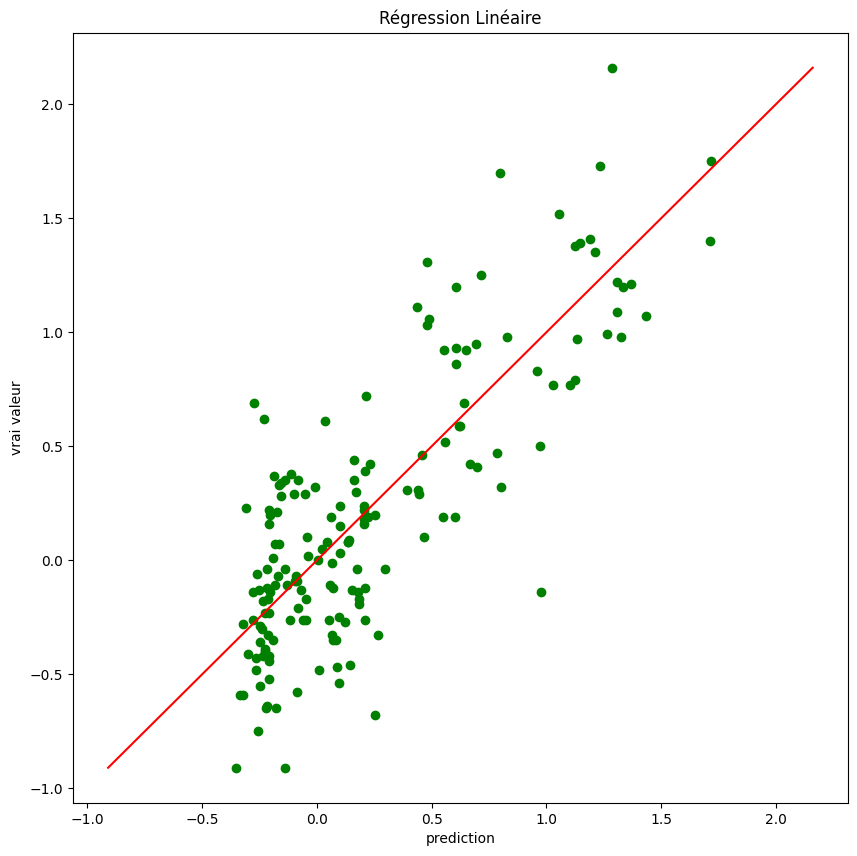

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test2)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire')

plt.show()

1.0
0.5621727635484711


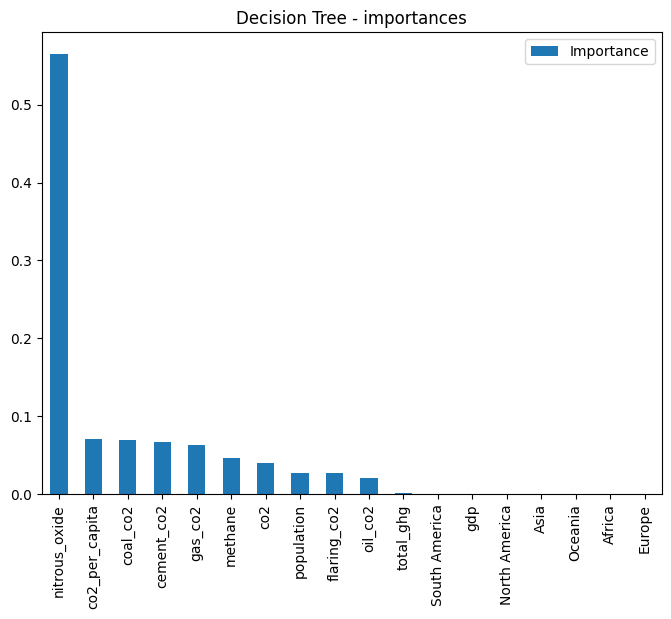

In [27]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
  
regressor.fit(X_train2, y_train)

print(regressor.score(X_train2,y_train))
print(regressor.score(X_test2,y_test))

import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Decision Tree - importances')
plt.show()

0.9502794603596183
0.7250903086802964


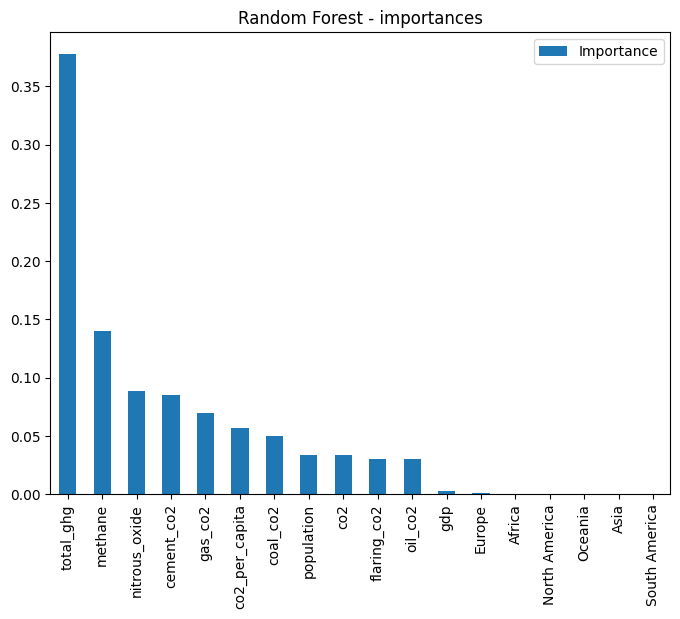

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train2, y_train)

print(rfr.score(X_train2, y_train))
print(rfr.score(X_test2, y_test))

feat_importances = pd.DataFrame(rfr.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Random Forest - importances')
plt.show()